In [2]:
! pip install matplotlib
! pip install networkx

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 37.6 MB/s  0:00:00 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 37.6 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 38.9 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 43.8 MB/s  0:00:00eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 42.1 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8/8 [matplotlib]8 [matplotlib]
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 22.7 MB/s  0:00:00


In [3]:
# we will load the weights created by picat
import networkx as nx
import ast
import re
import matplotlib.pyplot as plt

In [4]:

# graph
# nodes = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'S']




In [6]:
def get_shortest_path(weights_string):
    quoted_string = re.sub(r'\b([A-Z])\b', r"'\1'", weights_string)
    edges_with_weights = ast.literal_eval(quoted_string)
    assert(sorted([w[1:][0] for w in edges_with_weights]) == list(range(1,25))) # all numbers 1 to 24
    G = nx.Graph()
    for ((u, v), w) in edges_with_weights:
        G.add_edge(u, v, weight=w)
    shortest_path = nx.shortest_path(G, source='S', target='E', weight='weight')
    return (G, shortest_path)

def get_message(G, shortest_path):
    shortest_path_weights = [G[u][v]['weight'] for u, v in zip(shortest_path[:-1], shortest_path[1:])]
    message = ['ABCDEFGHIJKLMNOPQRSTUVWXYZ'[i-1] for i in shortest_path_weights]
    return ''.join(message)


In [7]:
# open solutions file and read each weight string
messages = []
graphs = []
with open('solutions.txt') as f:
    for weights_string in f:
        G, shortest_path = get_shortest_path(weights_string)
        graphs.append(G)
        messages.append(get_message(G, shortest_path))
deduped_messages = sorted(list(set(messages)))
with open('messages.txt', 'w') as f:
    for message in deduped_messages:
        f.write(message + '\n')
        f.write(message[::-1] + '\n')


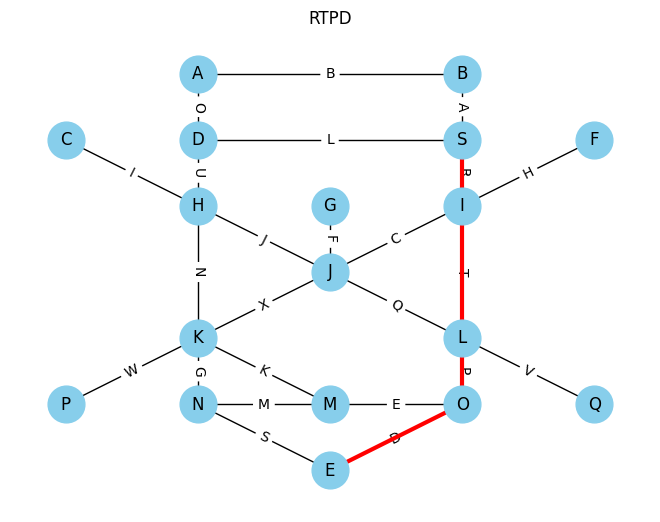

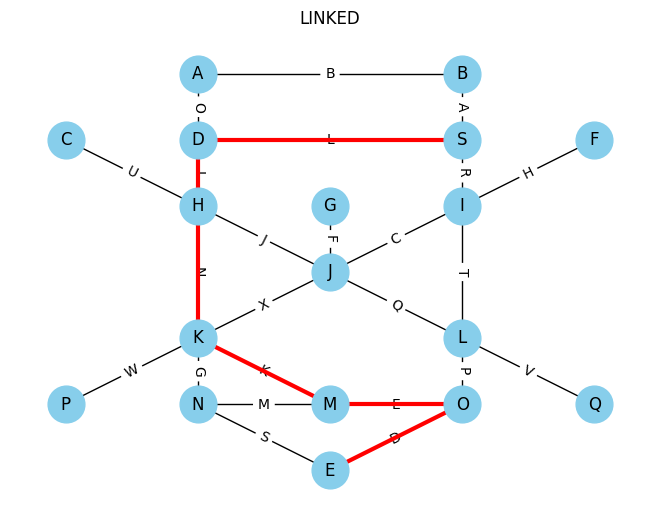

In [8]:
# draw the graphs
pos = {
    'A':(-1,3),
    'B':(1,3),
    'D':(-1,2),
    'S':(1,2),
    'H':(-1,1),
    'I':(1,1),
    'C':(-2,2),
    'F':(2,2),
    'G':(0,1),
    'J':(0,0),
    'K':(-1,-1),
    'L':(1,-1),
    'P':(-2,-2),
    'Q':(2,-2),
    'M':(0,-2),
    'N':(-1,-2),
    'O':(1,-2),
    'E':(0,-3)
}
for i, G in enumerate(graphs):
    plt.figure(i)
    # pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_size=700, node_color='skyblue')
    edge_labels = {edge: chr(64 + weight) for edge, weight in nx.get_edge_attributes(G, 'weight').items()}
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
    # highlight the shortest path
    shortest_path = nx.shortest_path(G, source='S', target='E', weight='weight')
    edges = [(u, v) for u, v in zip(shortest_path[:-1], shortest_path[1:])]
    nx.draw_networkx_edges(G, pos, edgelist=edges, edge_color='r', width=3)
    plt.title(messages[i])


